In [1]:
# System 
import sys, os
import warnings
from tqdm.autonotebook import tqdm
sys.path.append('//Users//KattPaint//Desktop//DATASCI266//Modern-Time-Series-Forecasting-with-Python')
from src.utils.general import LogTime

# Data Manipulation 
import pandas as pd
import numpy as np 
import math
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

# Visualization 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
from itertools import cycle
import seaborn as sns

# Modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from src.transforms.target_transformations import AutoStationaryTransformer


# Global Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/var/folders/f6/7fg5p95n44sd8qk792nr68d40000gn/T/ipykernel_69913/600399243.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import Data

In [2]:
data = pd.read_csv('../data/monthly_target_economic_factors.csv')
data = data.rename({'Unnamed: 0':'time_index'}, axis=1)
data = data.set_index('time_index')
data.index = pd.to_datetime(data.index)
data.index.freq = 'MS'
data.head()

t10yr  cpi  unemp    ppi  saving  euexch  chexch  ruexch  ffr  \
time_index                                                                  
1999-01-01   4.72 0.24   4.30 122.90    6.10    1.16    8.28   22.29 4.63   
1999-02-01   5.00 0.12   4.40 122.30    6.00    1.12    8.28   22.90 4.76   
1999-03-01   5.23 0.30   4.20 122.60    5.60    1.09    8.28   23.48 4.81   
1999-04-01   5.18 0.73   4.30 123.60    4.70    1.07    8.28   24.74 4.74   
1999-05-01   5.54 0.00   4.20 124.70    4.40    1.06    8.28   24.46 4.74   

            month  
time_index         
1999-01-01      1  
1999-02-01      2  
1999-03-01      3  
1999-04-01      4  
1999-05-01      5

# Dealing with Non-Stationarity 

In [3]:
# define variables 
freq = 'MS'
ma_window = 12
seasonal_periods = 12

transformer_pipelines = {}
auto_stationary = AutoStationaryTransformer(seasonal_period=seasonal_periods)
y = data[["t10yr"]]
y_stat = auto_stationary.fit_transform(y, freq=freq)
data.loc[:, ["t10yr_stat"]] = y_stat.values
transformer_pipelines.update({'add_stationary':auto_stationary})

In [4]:
data.head()

t10yr  cpi  unemp    ppi  saving  euexch  chexch  ruexch  ffr  \
time_index                                                                  
1999-01-01   4.72 0.24   4.30 122.90    6.10    1.16    8.28   22.29 4.63   
1999-02-01   5.00 0.12   4.40 122.30    6.00    1.12    8.28   22.90 4.76   
1999-03-01   5.23 0.30   4.20 122.60    5.60    1.09    8.28   23.48 4.81   
1999-04-01   5.18 0.73   4.30 123.60    4.70    1.07    8.28   24.74 4.74   
1999-05-01   5.54 0.00   4.20 124.70    4.40    1.06    8.28   24.46 4.74   

            month  t10yr_stat  
time_index                     
1999-01-01      1        2.08  
1999-02-01      2        2.33  
1999-03-01      3        2.53  
1999-04-01      4        2.50  
1999-05-01      5        2.80

# Understanding Seasonality

Text(0, 0.5, 'Remainder')

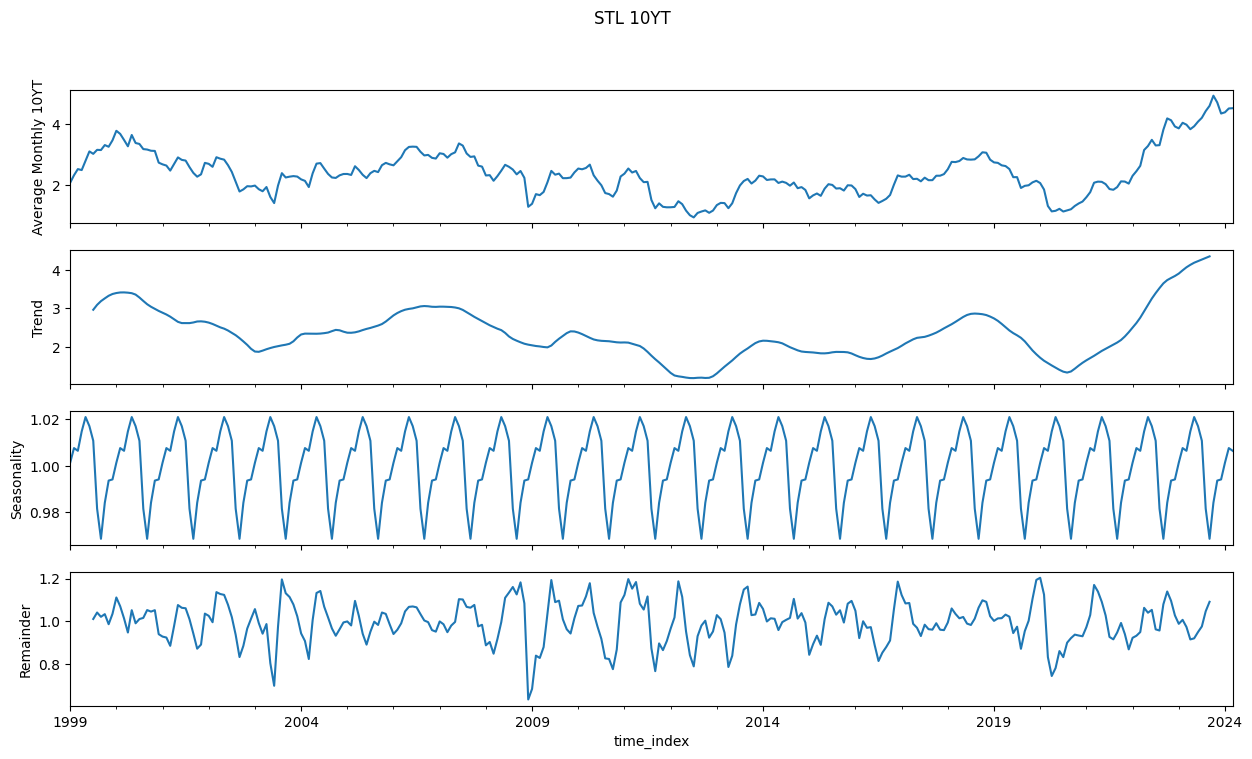

In [5]:
# subset stat 
df_rr = data[['t10yr_stat']]

# decompistion pretty graph
res = seasonal_decompose(df_rr, model="multiplicative")

fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8), sharex=True)
fig.suptitle('STL 10YT')

# observed 
res.observed.plot(ax=ax0)
ax0.set_ylabel("Average Monthly 10YT")

# trend
res.trend.plot(ax=ax1)
ax1.set_ylabel("Trend")

# seasonality 
res.seasonal.plot(ax=ax2)
ax2.set_ylabel("Seasonality")

# residuals 
res.resid.plot(ax=ax3)
ax3.set_ylabel("Remainder")

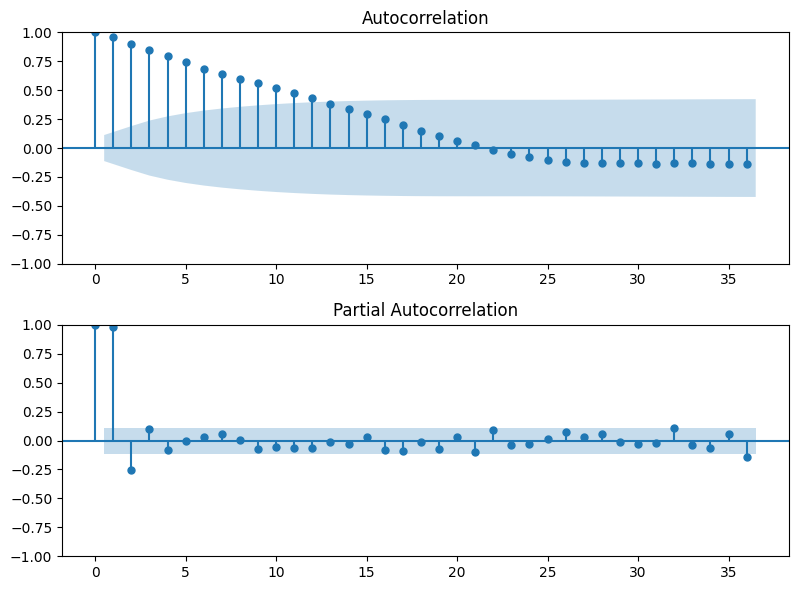

In [6]:
width, height = 8, 3
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(data.t10yr_stat, ax=ax[0], lags = seasonal_periods*3)
plot_pacf(data.t10yr_stat, ax=ax[1], method='ols', lags = seasonal_periods*3)

plt.tight_layout()
plt.show()

# Target

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/f6/7fg5p95n44sd8qk792nr68d40000gn/T/ipykernel_69913/1278001474.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ticks, rotation=60)


[Text(0, 0, '1999'),
 Text(1, 0, '2000'),
 Text(2, 0, '2001'),
 Text(3, 0, '2002'),
 Text(4, 0, '2003'),
 Text(5, 0, '2004'),
 Text(6, 0, '2005'),
 Text(7, 0, '2006'),
 Text(8, 0, '2007'),
 Text(9, 0, '2008'),
 Text(10, 0, '2009'),
 Text(11, 0, '2010'),
 Text(12, 0, '2011'),
 Text(13, 0, '2012'),
 Text(14, 0, '2013'),
 Text(15, 0, '2014'),
 Text(16, 0, '2015'),
 Text(17, 0, '2016'),
 Text(18, 0, '2017'),
 Text(19, 0, '2018'),
 Text(20, 0, '2019'),
 Text(21, 0, '2020'),
 Text(22, 0, '2021'),
 Text(23, 0, '2022'),
 Text(24, 0, '2023'),
 Text(25, 0, '2024')]

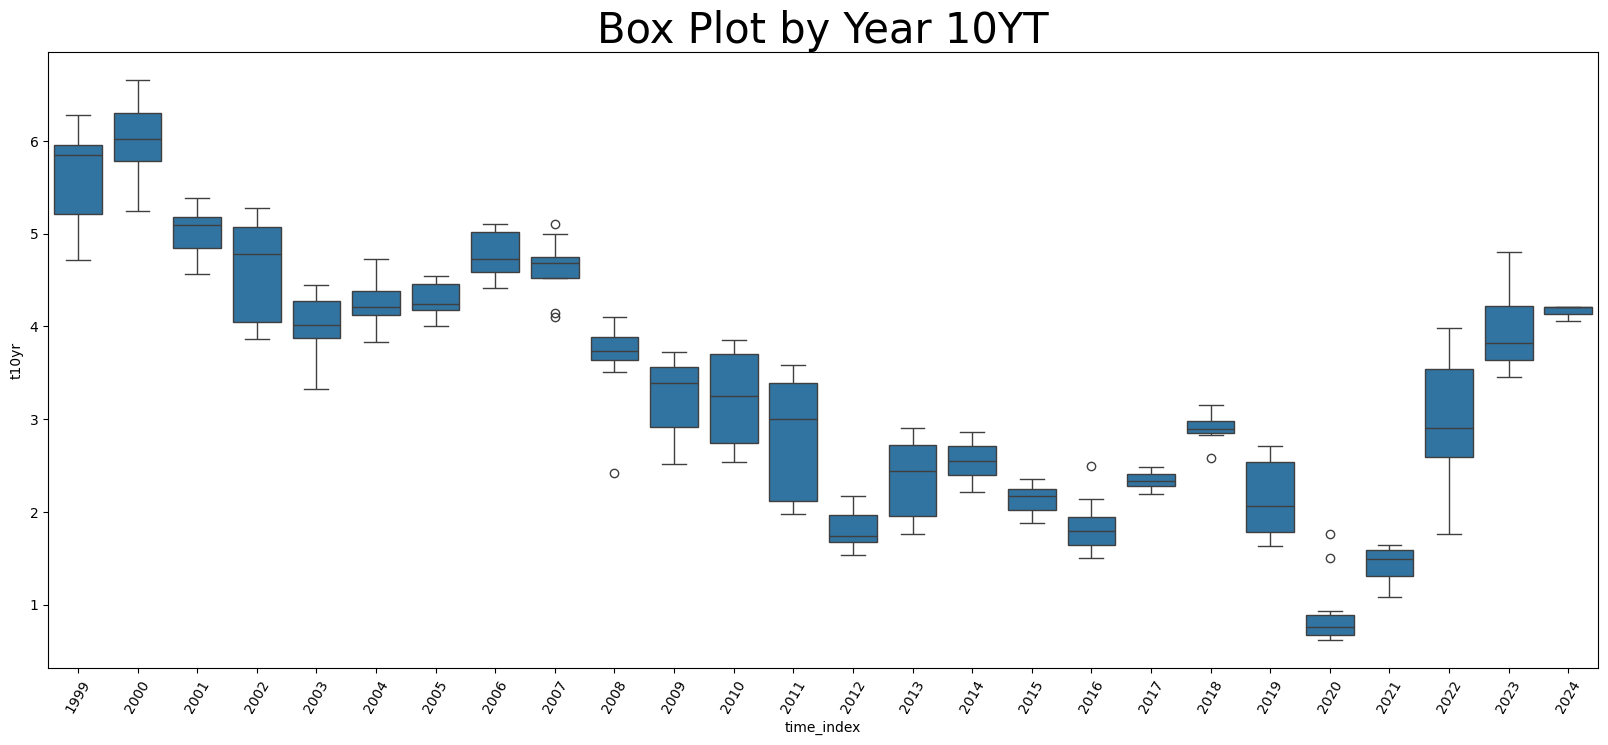

In [7]:
# box plot of monthly average 10YT
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=data.index.year, y=data['t10yr'])
ax.set_title('Box Plot by Year 10YT',fontsize=30)
ticks = ax.get_xticklabels()
ax.set_xticklabels(ticks, rotation=60)

<Axes: >

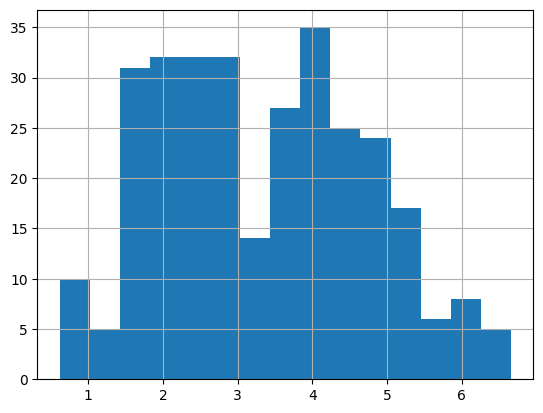

In [8]:
data.t10yr.hist(bins=15)

In [9]:
data.t10yr.describe()

count   303.00
mean      3.35
std       1.37
min       0.62
25%       2.21
50%       3.39
75%       4.37
max       6.66
Name: t10yr, dtype: float64

# Features 

In [22]:
features = data.columns[1:-2]

array([[<Axes: title={'center': 'cpi'}>,
        <Axes: title={'center': 'unemp'}>,
        <Axes: title={'center': 'ppi'}>],
       [<Axes: title={'center': 'saving'}>,
        <Axes: title={'center': 'euexch'}>,
        <Axes: title={'center': 'chexch'}>],
       [<Axes: title={'center': 'ruexch'}>,
        <Axes: title={'center': 'ffr'}>, <Axes: >]], dtype=object)

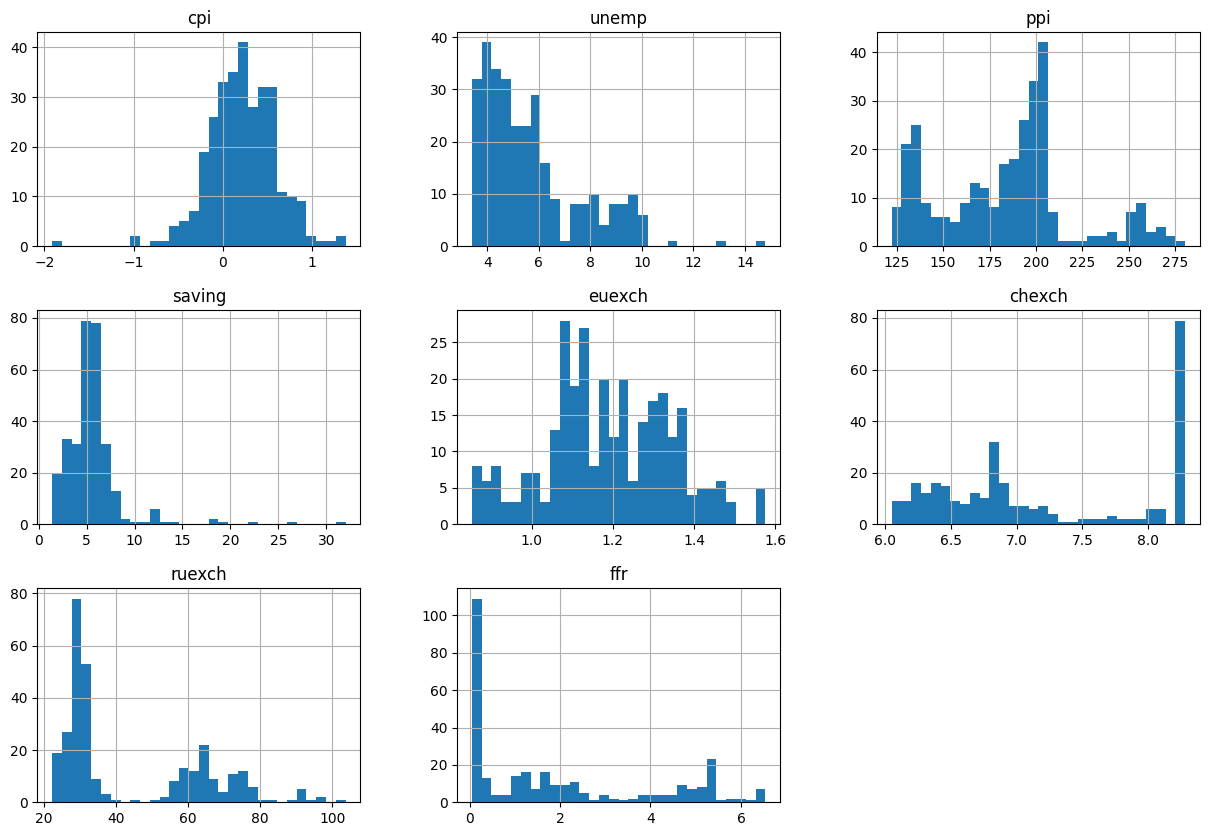

In [23]:
# distributions
data[features].hist(bins=30, figsize=(15, 10))

In [24]:
# scale continous features 
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

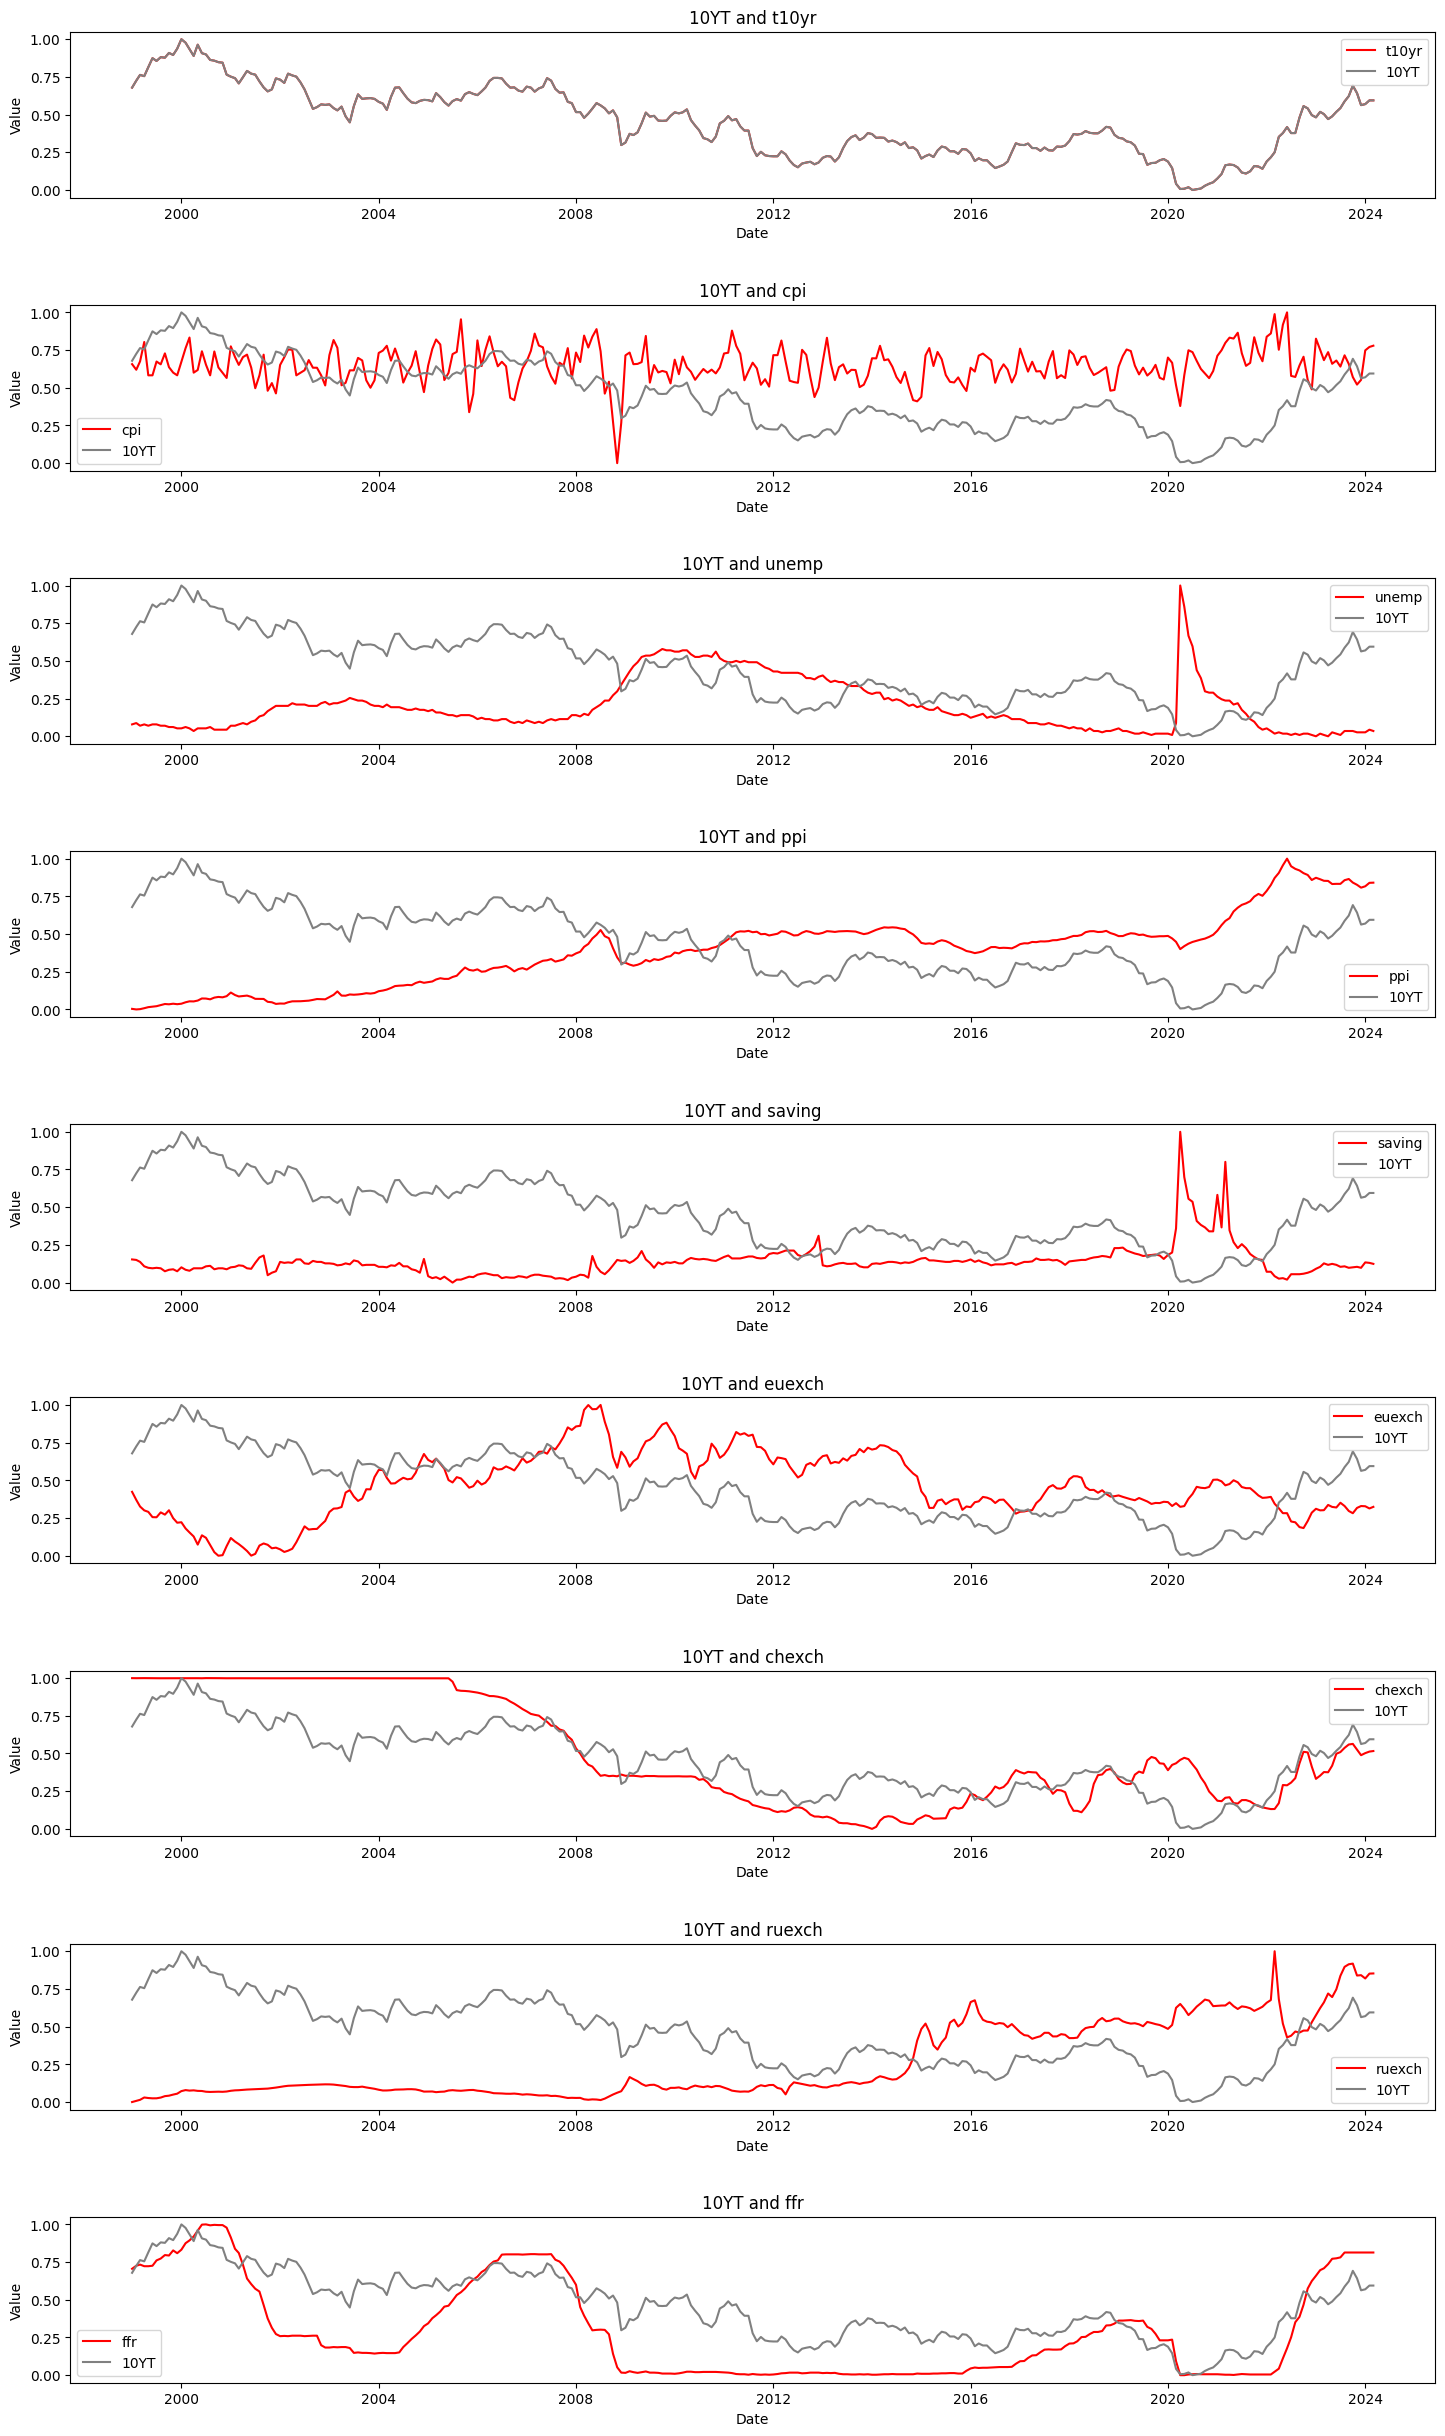

In [25]:
# compare 10YT and features
num_vars = len(features) + 1
col_names = data.columns
scaled_features = data_scaled
fig = plt.figure(figsize=(15, 25))
for i in range(num_vars):
  ax = fig.add_subplot(num_vars,1,i+1)
  ax.plot(data.index, scaled_features[:,i], label=col_names[i], c='red')
  ax.plot(data.index, data_scaled[:,0], label='10YT', c='grey')
  ax.set_title('10YT and ' + col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Value')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

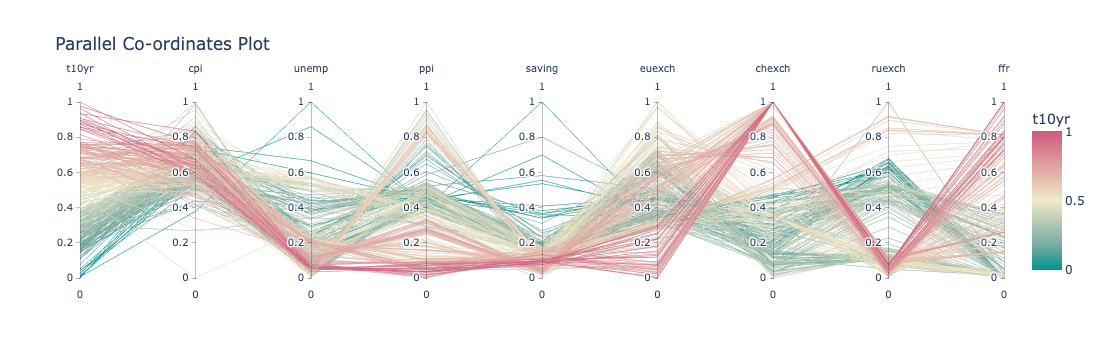

In [26]:
# parallel co-ordinates plots 
data_scaled = pd.DataFrame(data_scaled, columns=col_names).drop(['month', 't10yr_stat'], axis=1)

fig = px.parallel_coordinates(data_scaled, color='t10yr',color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Co-ordinates Plot')

fig.show()

Text(0.5, 1.0, 'Heatmap Spearman Correlation')

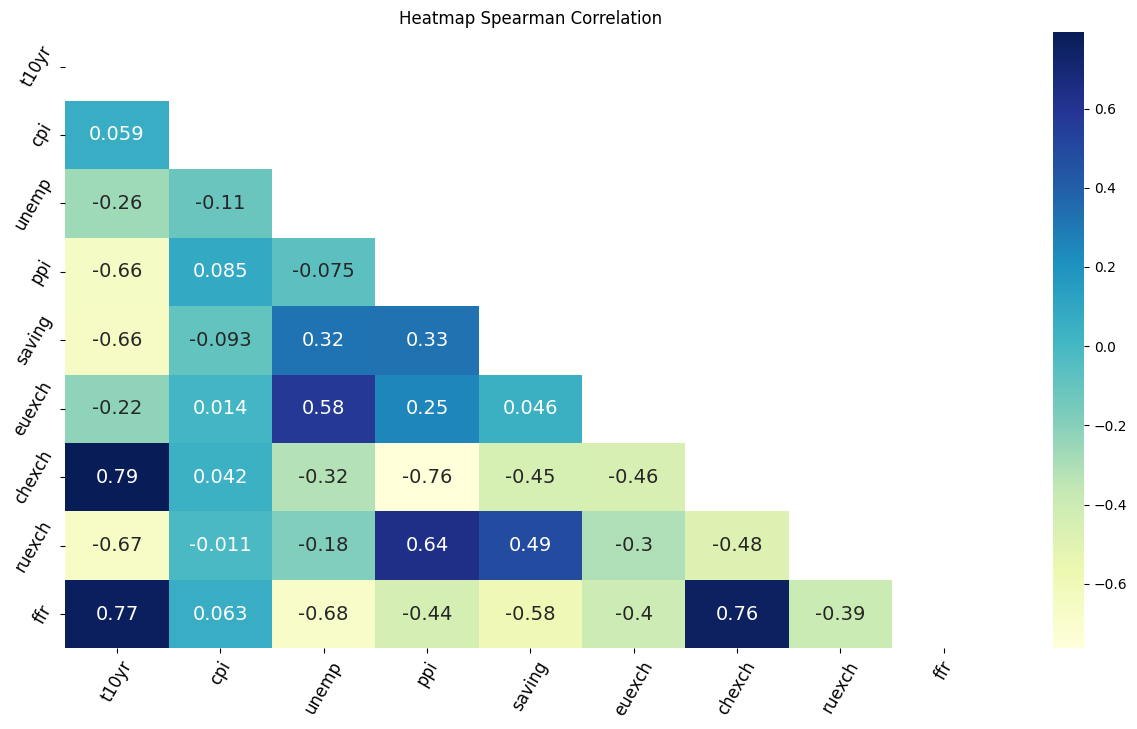

In [27]:
plt.figure(figsize=(15,8))
matrix = np.triu(data_scaled.corr(method='spearman'))
heat_map = sns.heatmap(data_scaled.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')